In [61]:
"""
@author Ryan Williams
     
     Notebook 2 - Data Exploration

@date June-July, 2021
"""

'\n@author Ryan Williams\n     \n     Notebook 2 - Data Exploration\n\n@date June-July, 2021\n'

# Notebook 2 - Data Explorations

**Aim:** This notebook aims to explore the Physionet cardilogy challenge 2019 dataset, this is to aid our understanding of its data. This is very important in enabling us to make informed decisions at later stages of developement.

**Summary:** 
- Import necessary packages.
- Setup a colour palette for our later visualisations.
- Define the output directory for the figures we will create.
- Import the whole datasest into a dataframe object, from its stored pickle file, which was created by Notebook 1.
- Then we will explore the dataset.
- Examine the distiribution of sepsis amoung a sample of the population.
- Look at the feaetures through the whole population.
- Examine the characteristics of the data.


Import necessary packages.

In [1]:
# Imports
import random  # For generating random numbers
import matplotlib  # For figure creation
import numpy as np   # For some maths operations
import pandas as pd  # For using pandas daraframe
import seaborn as sns  # For figure creation
import scipy.stats as st  # For science based mathmatical operations
import matplotlib.pyplot as plt  # For Figure creation
from sklearn import preprocessing  # For preprocessing
import matplotlib.patches as mpatches  # For Figure creation

Setup a colour palette for our later visualisations.

In [2]:
# Define a qualitative colour palette
# palette generated at: https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=7
colours = ['#80b1d3', '#fb8072', '#8dd3c7', '#ffffb3', '#bebada', '#fdb462', '#b3de69']

# Define colourblind friendly diverging colour palette, from:
# https://colorbrewer2.org/#type=diverging&scheme=RdBu&n=3
diverging_colours = ['#ef8a62', '#f7f7f7', '#67a9cf']

Define the output directory for the figures we will create.

In [3]:
# Define directory to save Figures as images too by defualt
figures_directory = './sepsis-detection/notebooks/Notebook 2 - Data Explorations/figures/'

Import the whole datasest into a dataframe object, from its stored pickle file, which was created by Notebook 1.

In [4]:
# Lets import the full parsed dataset from Notebook 1.
full_dataset = pd.read_pickle('./sepsis-detection/data/interim/from Notebook 1/full_base_dataset.pkl')
# Create a copy for exploration.
dataset_explore = full_dataset.copy()

# Explore the data 

Lets look at the shape of the dataset

In [3]:
print('Number of rows:', dataset_explore.shape[0],
      '\nNumber of columns:', dataset_explore.shape[1])

Number of rows: 1552210 
Number of columns: 42


Lets look at the first five elements of the dataset.

In [68]:
dataset_explore.head()

HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  BaseExcess  HCO3  ...  \
0    NaN    NaN   NaN    NaN    NaN  NaN   NaN    NaN         NaN   NaN  ...   
1   97.0   95.0   NaN   98.0  75.33  NaN  19.0    NaN         NaN   NaN  ...   
2   89.0   99.0   NaN  122.0  86.00  NaN  22.0    NaN         NaN   NaN  ...   
3   90.0   95.0   NaN    NaN    NaN  NaN  30.0    NaN        24.0   NaN  ...   
4  103.0   88.5   NaN  122.0  91.33  NaN  24.5    NaN         NaN   NaN  ...   

   Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  83.14       0    NaN    NaN        -0.03       1   
1         NaN        NaN  83.14       0    NaN    NaN        -0.03       2   
2         NaN        NaN  83.14       0    NaN    NaN        -0.03       3   
3         NaN        NaN  83.14       0    NaN    NaN        -0.03       4   
4         NaN        NaN  83.14       0    NaN    NaN        -0.03       5   

   SepsisLabel  patientID  
0            0    p000001  
1            0    p000001  
2            0    p000001  
3            0    p000001  
4            0    p000001  

[5 rows x 42 columns]

# Lets look at a sample of our patient population


Lets sample 10 patients which dont develop sepsis and 10 who do 

In [16]:
# Lets make a parallel coordinates plot to show 10 sepsis positive cases
# and 10 negative cases as they progress

# Sample 10 patients which do develop sepsis
all_positive_patients = dataset_explore.loc[dataset_explore['SepsisLabel'] > 0]
sepsis_positive_IDs_sample = all_positive_patients['patientID'].drop_duplicates().sample(n=10, random_state=1).to_list()

# Sample 10 patients which do NOT develop sepsis
all_negative_patients = (dataset_explore.loc[~dataset_explore['patientID'].isin(all_positive_patients['patientID'])])
sepsis_negative_IDs_sample = all_negative_patients['patientID'].drop_duplicates().sample(n=10, random_state=1).to_list()

# Lets gather and normalize the data
# We remove the static features as they wont help us
static_features = ['Gender', 'ICULOS', 'HospAdmTime', 'Age', 'patientID', 'Unit1', 'Unit2']
dataset_explore_normalized = dataset_explore
dataset_explore_normalized = dataset_explore_normalized.drop(columns=static_features)
# Min max normalize
dataset_explore_normalized = (dataset_explore_normalized-dataset_explore_normalized.min())/(dataset_explore_normalized.max()-dataset_explore_normalized.min())
# Pass back in patientID
dataset_explore_normalized['patientID'] = dataset_explore['patientID']

Lets look at how patients which develop sepsis compare to those who dont, we will only compare with features that contain less than 70% null content

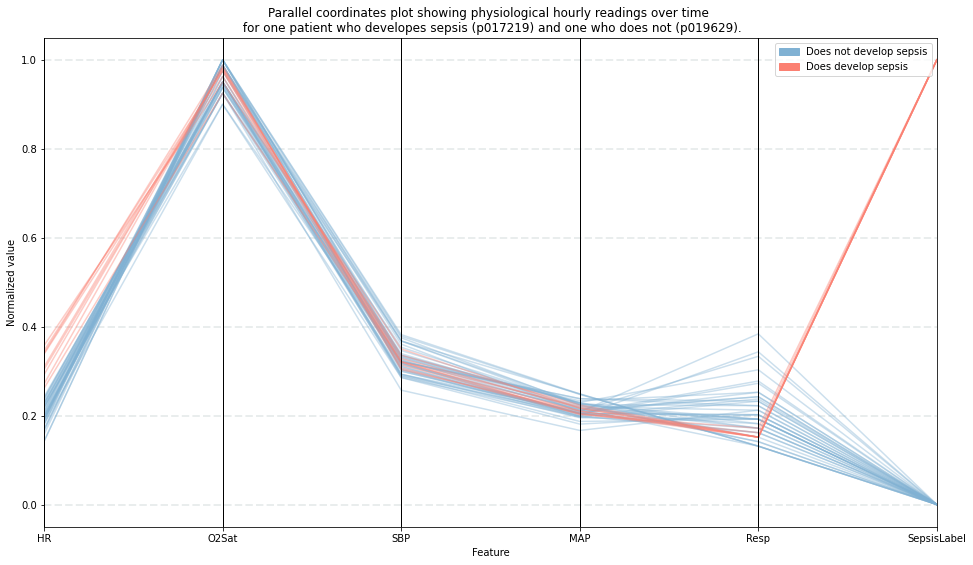

In [70]:
# Lets use a parallel coordinates plot to look at how a random patient who developes
# sepsis and a patient that doesnt's features averages and trends.
# each line represents one hourly reading

# define one random patient from each sample to plot, then retrieve all the rows for these two from
# the whole dataset
# Ensure the negative patient is passed in first, then the positive, this ensures matching with the
# the figure's colours and legend.
data_to_plot = (dataset_explore_normalized.loc[dataset_explore_normalized['patientID'].isin([random.choice(sepsis_negative_IDs_sample)])])
data_to_plot = pd.concat([data_to_plot, (dataset_explore_normalized.loc[dataset_explore_normalized['patientID'].isin([random.choice(sepsis_positive_IDs_sample)])])])
# Remove the features which have a large amount of null values (more than 70%)
# as these create a  disjointed parallel plot otherwise
data_to_plot = data_to_plot[((data_to_plot.isnull().sum().loc[data_to_plot.isnull().sum() < (data_to_plot.shape[0] * 0.70)]).to_frame().index).to_list()]

# Define figure's size, type and grid overlay
plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(data_to_plot, 'patientID', color=colours[0:2], alpha=0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
no_sepsis_dev = mpatches.Patch(color=colours[0], label='Does not develop sepsis')
sepsis_dev = mpatches.Patch(color=colours[1], label='Does develop sepsis')
plt.legend(handles=[no_sepsis_dev, sepsis_dev], loc="upper right")
plt.title('Parallel coordinates plot showing physiological hourly readings over time \n for one patient who developes sepsis ('+str(data_to_plot['patientID'].iloc[0])+') and one who does not ('+str(data_to_plot['patientID'].iloc[data_to_plot.shape[0]-1])+').')
plt.xlabel('Feature')
plt.ylabel('Normalized value')
# Save our figure and then show
plt.savefig(figures_directory+'parallel_plot_two_samples.jpg')
plt.show()

Lets look at how sepsis developement itself may effect a patient's features

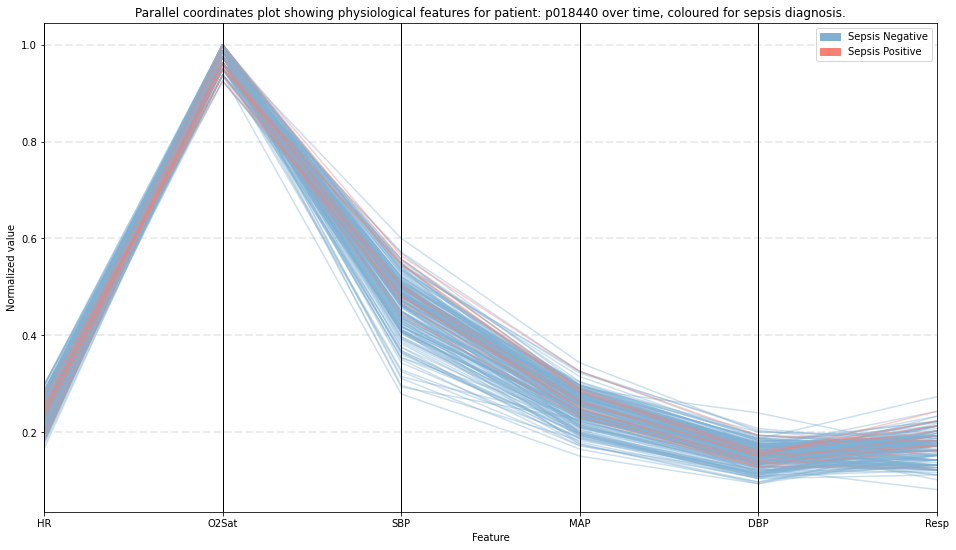

In [14]:
# Lets use a parallel coordinates plot to show us how a patients physiological
# readings may alter across time before sepsis diagnosis
# each line represents one hourly reading

# define one random patient from the positive sample, retrieve their data from
# the full dataset
data_to_plot = (dataset_explore_normalized.loc[dataset_explore_normalized['patientID'].isin([random.choice(sepsis_positive_IDs_sample)])])

# Remove the features which have a large amount of null values (more than 70%)
# as these create a  disjointed parallel plot otherwise
data_to_plot = data_to_plot[((data_to_plot.isnull().sum().loc[data_to_plot.isnull().sum() < (data_to_plot.shape[0] * 0.70)]).to_frame().index).to_list()]

# Define figure's size, type and grid overlay
# pass in the data without patientID as it isnt needed
plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(data_to_plot.drop(columns='patientID'), 'SepsisLabel', color=colours[0:2], alpha=0.4)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)

# Define the axis labels, title and properties of legend.
no_sepsis_dev = mpatches.Patch(color=colours[0], label='Sepsis Negative')
sepsis_dev = mpatches.Patch(color=colours[1], label='Sepsis Positive')
plt.legend(handles=[no_sepsis_dev, sepsis_dev], loc="upper right")
plt.title('Parallel coordinates plot showing physiological features for patient: '+str(data_to_plot['patientID'].iloc[0])+' over time, coloured for sepsis diagnosis.')
plt.xlabel('Feature')
plt.ylabel('Normalized value')
# Save our figure and then show
plt.savefig(figures_directory+'parallel_plot_one_postive_samples.jpg')
plt.show()

Lets look at trends through our whole sample

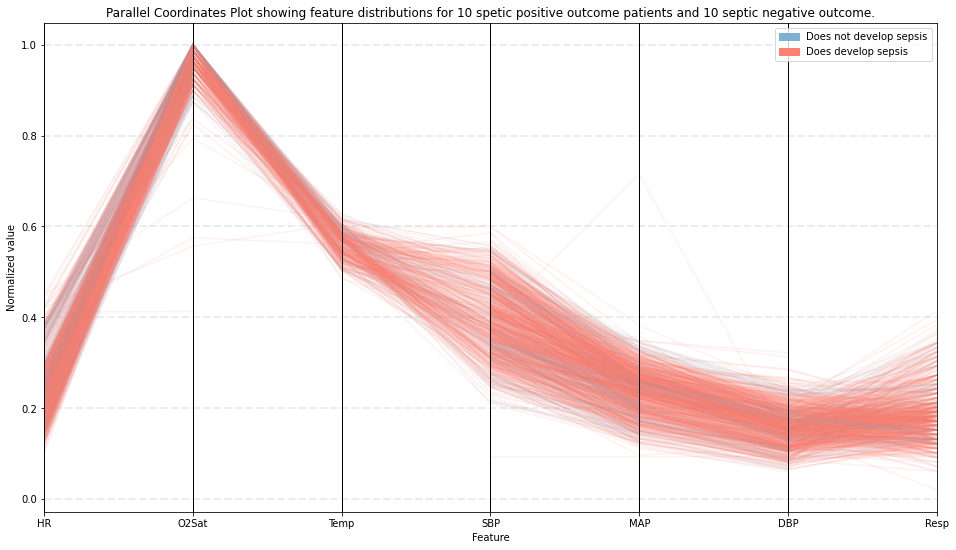

In [22]:
# Lets use a parallel coordinates plot to look at how our random samples
# look over time
# each line represents one hourly reading

# define one random patient from each sample to plot, then retrieve all the rows for these two from
# the whole dataset
data_to_plot = (dataset_explore_normalized.loc[dataset_explore_normalized['patientID'].isin(sepsis_negative_IDs_sample + sepsis_positive_IDs_sample)])

# Remove the features which have a large amount of null values (more than 70%)
# as these create a  disjointed parallel plot otherwise
data_to_plot = data_to_plot[((data_to_plot.isnull().sum().loc[data_to_plot.isnull().sum() < (data_to_plot.shape[0] * 0.70)]).to_frame().index).to_list()]

# Define figure's size, type and grid overlay
plt.figure(figsize=(16, 9))
pd.plotting.parallel_coordinates(data_to_plot.drop(columns='patientID'), 'SepsisLabel', color=colours[0:2], alpha=0.1)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
no_sepsis_dev = mpatches.Patch(color=colours[0], label='Does not develop sepsis')
sepsis_dev = mpatches.Patch(color=colours[1], label='Does develop sepsis')
plt.legend(handles=[no_sepsis_dev, sepsis_dev], loc="upper right")
plt.title('Parallel Coordinates Plot showing feature distributions for 10 spetic positive outcome patients and 10 septic negative outcome.')
plt.xlabel('Feature')
plt.ylabel('Normalized value')
# Save our figure and then show
plt.savefig(figures_directory+'parallel_plot_all_samples.jpg')
plt.show()

# Lets look at the features within our whole population!


Lets use Panda's describe method to learn more about each feature.

In [73]:
# We will use describe function to learn more about the data
dataset_explore.describe()

HR         O2Sat           Temp           SBP           MAP  \
count  1.398811e+06  1.349474e+06  525226.000000  1.325945e+06  1.358940e+06   
mean   8.458144e+01  9.719395e+01      36.977228  1.237505e+02  8.240010e+01   
std    1.732524e+01  2.936924e+00       0.770014  2.323156e+01  1.634175e+01   
min    2.000000e+01  2.000000e+01      20.900000  2.000000e+01  2.000000e+01   
25%    7.200000e+01  9.600000e+01      36.500000  1.070000e+02  7.100000e+01   
50%    8.350000e+01  9.800000e+01      37.000000  1.210000e+02  8.000000e+01   
75%    9.550000e+01  9.950000e+01      37.500000  1.380000e+02  9.200000e+01   
max    2.800000e+02  1.000000e+02      50.000000  3.000000e+02  3.000000e+02   

                DBP          Resp         EtCO2    BaseExcess          HCO3  \
count  1.065656e+06  1.313875e+06  57636.000000  84145.000000  65028.000000   
mean   6.383056e+01  1.872650e+01     32.957657     -0.689919     24.075481   
std    1.395601e+01  5.098194e+00      7.951662      4.294297      4.376504   
min    2.000000e+01  1.000000e+00     10.000000    -32.000000      0.000000   
25%    5.400000e+01  1.500000e+01     28.000000     -3.000000     22.000000   
50%    6.200000e+01  1.800000e+01     33.000000      0.000000     24.000000   
75%    7.200000e+01  2.150000e+01     38.000000      1.000000     26.800000   
max    3.000000e+02  1.000000e+02    100.000000    100.000000     55.000000   

       ...           WBC    Fibrinogen     Platelets           Age  \
count  ...  99447.000000  10242.000000  92209.000000  1.552210e+06   
mean   ...     11.446405    287.385706    196.013911  6.200947e+01   
std    ...      7.731013    153.002908    103.635366  1.638622e+01   
min    ...      0.100000     34.000000      1.000000  1.400000e+01   
25%    ...      7.600000    184.000000    126.000000  5.168000e+01   
50%    ...     10.300000    250.000000    181.000000  6.400000e+01   
75%    ...     13.800000    349.000000    244.000000  7.400000e+01   
max    ...    440.000000   1760.000000   2322.000000  1.000000e+02   

             Gender          Unit1          Unit2   HospAdmTime        ICULOS  \
count  1.552210e+06  940250.000000  940250.000000  1.552202e+06  1.552210e+06   
mean   5.592690e-01       0.496571       0.503429 -5.612512e+01  2.699499e+01   
std    4.964749e-01       0.499989       0.499989  1.622569e+02  2.900542e+01   
min    0.000000e+00       0.000000       0.000000 -5.366860e+03  1.000000e+00   
25%    0.000000e+00       0.000000       0.000000 -4.705000e+01  1.100000e+01   
50%    1.000000e+00       0.000000       1.000000 -6.030000e+00  2.100000e+01   
75%    1.000000e+00       1.000000       1.000000 -4.000000e-02  3.400000e+01   
max    1.000000e+00       1.000000       1.000000  2.399000e+01  3.360000e+02   

        SepsisLabel  
count  1.552210e+06  
mean   1.798468e-02  
std    1.328956e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00  

[8 rows x 41 columns]

Frequency of ages

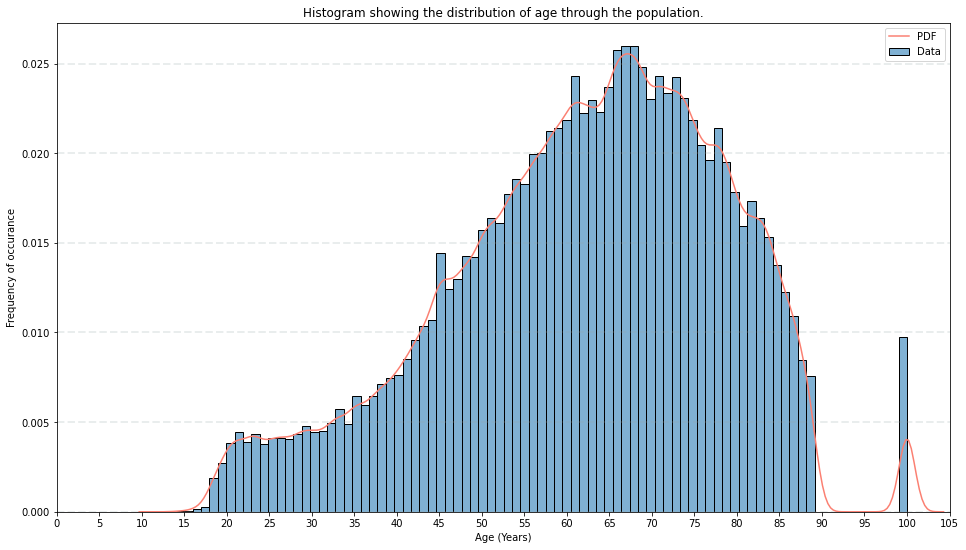

In [74]:
# Lets look at the age distribution across the population

# Define figure's size, type and grid overlay
plt.figure(figsize=(16, 9))
plt.hist(dataset_explore['Age'], density=True, bins=87, label="Data", color = colours[0], edgecolor="black")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define a pdf line to show the theoretical underlying normal distribution
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(dataset_explore['Age'])
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF", color=colours[1])
# Define the axis labels and properties
plt.legend(loc="upper right")
plt.xticks(np.arange(0, 110, 5))
plt.title('Histogram showing the distribution of age through the population.')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency of occurance')
# Save our figure and then show
plt.savefig(figures_directory+'age_frequency.jpg')
plt.show()

Distribution of patients between genders

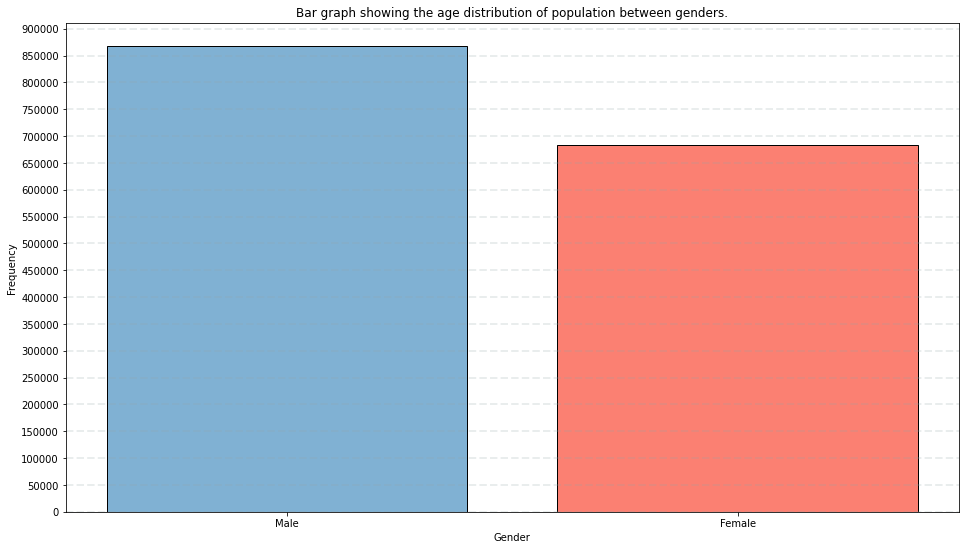

In [16]:
# Lets look at the patient population's distritbution between genders

# Define figure's size, type and grid overlay
plt.figure(figsize=(16, 9))
plt.bar(['Male', 'Female'], dataset_explore['Gender'].value_counts(), color=colours[0:2], edgecolor="black")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels and properties
plt.title('Bar graph showing the age distribution of population between genders.')
plt.xlabel('Gender')
plt.locator_params(axis='y', nbins=10)
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 950000, 50000))
# Save our figure and then show
plt.savefig(figures_directory+'gender_distribution.jpg')
plt.show()

Distibution of ages, between gender and across sepsis label

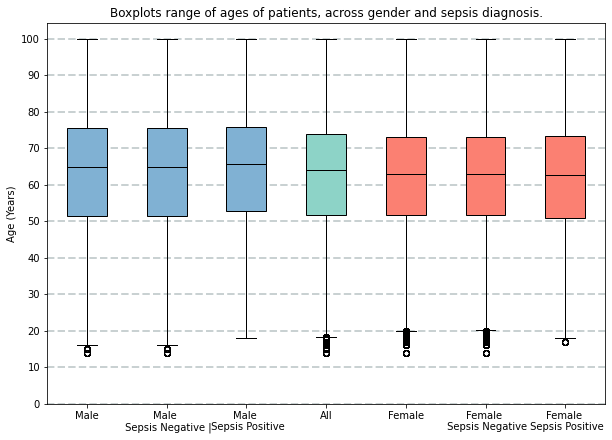

In [6]:
# Lets look for trends within age, gender and sepsis label.

# Extract the data from the dataset
# Male data
male_age = dataset_explore['Age'].loc[dataset_explore['Gender'] == 0].dropna().to_list()
male_age_sn = dataset_explore['Age'].loc[dataset_explore['SepsisLabel'] == 0].loc[dataset_explore['Gender'] == 0].dropna().to_list()
male_age_sp = dataset_explore['Age'].loc[dataset_explore['SepsisLabel'] == 1].loc[dataset_explore['Gender'] == 0].dropna().to_list()
# Female data
female_age = dataset_explore['Age'].loc[dataset_explore['Gender'] == 1].dropna().to_list()
female_age_sn = dataset_explore['Age'].loc[dataset_explore['SepsisLabel'] == 0].loc[dataset_explore['Gender'] == 1].dropna().to_list()
female_age_sp = dataset_explore['Age'].loc[dataset_explore['SepsisLabel'] == 1].loc[dataset_explore['Gender'] == 1].dropna().to_list()
# All data
all_age = dataset_explore['Age'].dropna().to_list()

# Define figure's size, type and grid overlay, with a subplot.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([male_age, male_age_sn, male_age_sp, all_age, female_age, female_age_sn, female_age_sp], patch_artist = True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
# Set colours for the box plots, allign with gender
for patch, color in zip(bp['boxes'], [colours[0], colours[0], colours[0],colours[2], colours[1], colours[1], colours[1]]):
    patch.set_facecolor(color)
# Set colours and width for median line
for median in bp['medians']:
    median.set(color ='black', linewidth = 1)
# Define the axis labels and properties
plt.title('Boxplots range of ages of patients, across gender and sepsis diagnosis.')
plt.ylabel('Age (Years)')
ax.set_xticklabels(['Male', 'Male \n Sepsis Negative |','Male \n Sepsis Positive','All', 'Female','Female \n Sepsis Negative','Female \n Sepsis Positive'])
plt.yticks(np.arange(0, 110, 10))
# Save our figure and then show
fig.savefig(figures_directory+'age_across_gender_sepsis.jpg')
plt.show(bp)

Heart Rate between gender across sepsis labels

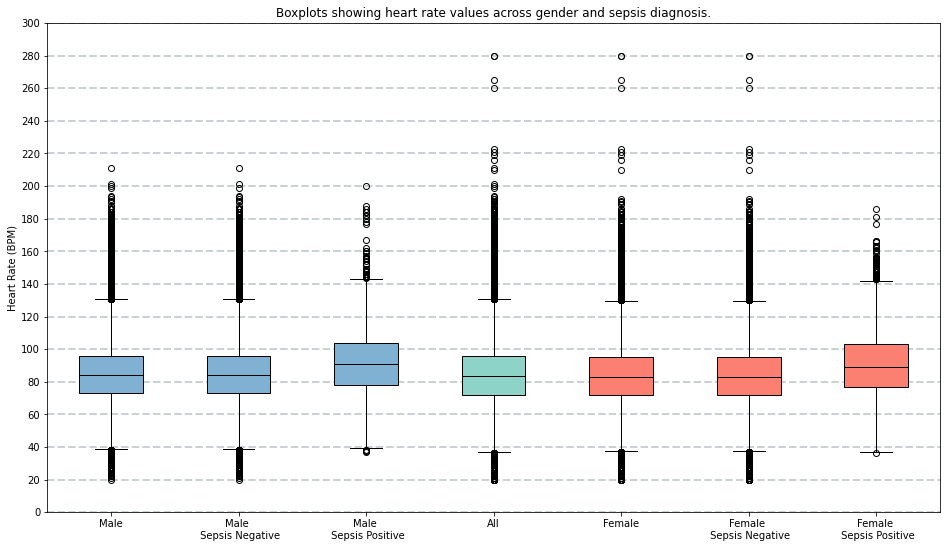

In [77]:
# Lets look for trends within heart rate, gender and sepsis label.

# Extract the data from the dataset
# Male data
male_HR = dataset_explore['HR'].loc[dataset_explore['Gender'] == 0].dropna().to_list()
male_HR_sn = dataset_explore['HR'].loc[dataset_explore['SepsisLabel'] == 0].loc[dataset_explore['Gender'] == 0].dropna().to_list()
male_HR_sp = dataset_explore['HR'].loc[dataset_explore['SepsisLabel'] == 1].loc[dataset_explore['Gender'] == 0].dropna().to_list()
# Female data
female_HR = dataset_explore['HR'].loc[dataset_explore['Gender'] == 1].dropna().to_list()
female_HR_sn = dataset_explore['HR'].loc[dataset_explore['SepsisLabel'] == 0].loc[dataset_explore['Gender'] == 1].dropna().to_list()
female_HR_sp = dataset_explore['HR'].loc[dataset_explore['SepsisLabel'] == 1].loc[dataset_explore['Gender'] == 1].dropna().to_list()
# All data
all_HR = dataset_explore['HR'].dropna().to_list()

# Define figure's size, type and grid overlay, with a subplot.
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)
bp = ax.boxplot([male_HR, male_HR_sn, male_HR_sp, all_HR,female_HR, female_HR_sn, female_HR_sp], patch_artist = True)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha= 0.5)
# Set colours for the box plots, allign with gender
for patch, color in zip(bp['boxes'], [colours[0], colours[0], colours[0],colours[2], colours[1], colours[1], colours[1]]):
    patch.set_facecolor(color)
# Set colours and width for median line
for median in bp['medians']:
    median.set(color = 'black', linewidth = 1)
# Define the axis labels and properties
plt.title('Boxplots showing heart rate values across gender and sepsis diagnosis.')
plt.ylabel('Heart Rate (BPM)')
ax.set_xticklabels(['Male', 'Male \n Sepsis Negative','Male \n Sepsis Positive', 'All' ,'Female','Female \n Sepsis Negative','Female \n Sepsis Positive'])
plt.yticks(np.arange(0, 320, 20))
# Save our figure and then show
fig.savefig(figures_directory+'heart_rate_gender.jpg')
plt.show(bp)

Lets look at how much data we have for patients on average.

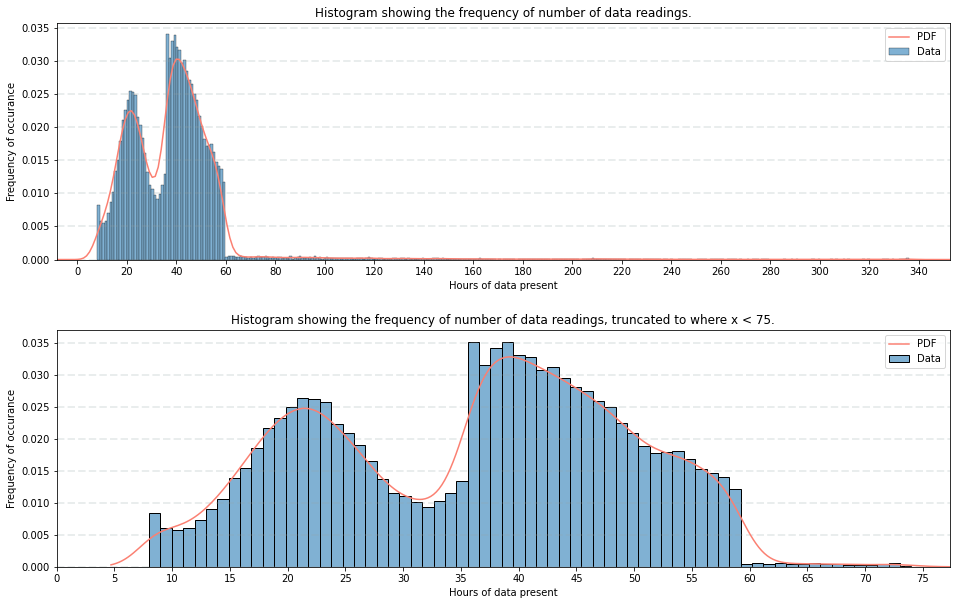

In [6]:
# Lets look at average amount of data we have for patients

# We will use a subplot so we can plot two histograms into one figure
# Define figure's size, place in subplot, type, grid overlay.
plt.figure(1, figsize=(16, 10))
plt.subplot(211)
plt.subplots_adjust(hspace=0.3) # define better spacing between the subplots 

plt.hist(dataset_explore['patientID'].value_counts(), density=True, bins=330, label="Data", color = colours[0], edgecolor="black", linewidth=0.3)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define a pdf line to show the theoretical underlying normal distribution
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(dataset_explore['patientID'].value_counts())
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF", color=colours[1])
# Define the axis labels and properties
plt.legend(loc="upper right")
plt.xticks(np.arange(0, 360, 20))
plt.title('Histogram showing the frequency of number of data readings.')
plt.xlabel('Hours of data present')
plt.ylabel('Frequency of occurance')

# Define figure's size, place in subplot, type, grid overlay.
plt.subplot(212)
# (dataset_explore['patientID'].value_counts()[1000:].drop_duplicates()).count() # use to calculate bin number
plt.hist(dataset_explore['patientID'].value_counts()[1000:], density=True, bins=67, label="Data", color = colours[0], edgecolor="black")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define a pdf line to show the theoretical underlying normal distribution
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(dataset_explore['patientID'].value_counts()[1000:])
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF", color=colours[1])
# Define the axis labels and properties
plt.legend(loc="upper right")
plt.xticks(np.arange(0, 80, 5))
plt.title('Histogram showing the frequency of number of data readings, truncated to where x < 75.')
plt.xlabel('Hours of data present')
plt.ylabel('Frequency of occurance')

# Save our figure and then show 
plt.savefig(figures_directory+'icu_stay_frequency.jpg')
plt.show()

Lets look for links between time spent in ICU (data recorded) and sepsis onset

In [7]:
# Average sepsisis onset time  

# Lets create a copy of the dataset with hourly time labels
dataset_explore_time = dataset_explore

times = [] 

for item in dataset_explore['patientID'].value_counts().sort_index().to_list():
    for i in range(item):
        times.append(i)

dataset_explore_time['time'] = times

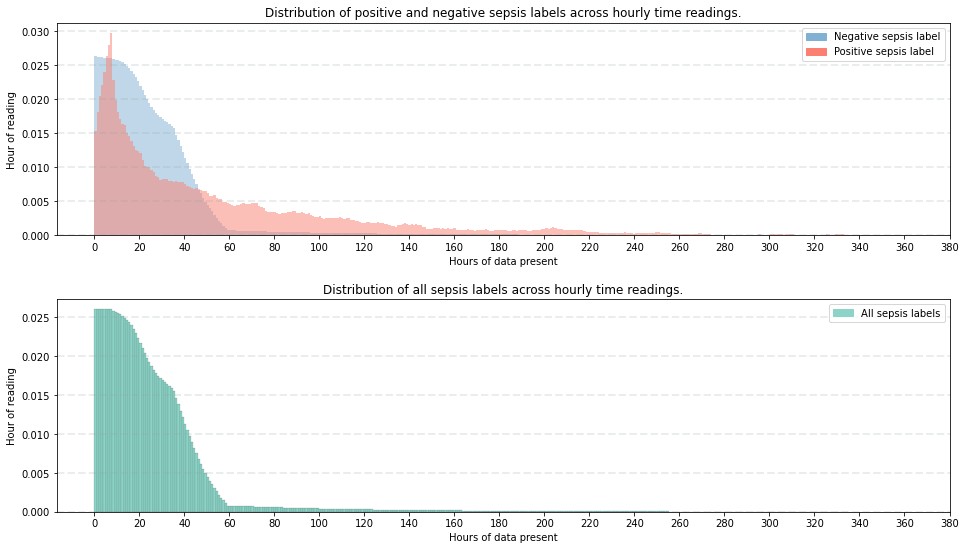

In [8]:
# Lets look at the distribution of time and sepsis labels 

# We will use a subplot so we can plot two histograms into one figure
# Define figure's size, place in subplot, type, grid overlay.
plt.figure(1, figsize=(16,9))
plt.subplot(211)
plt.subplots_adjust(hspace=0.3) # define better spacing between the subplots 

#dataset_explore['time'].loc[dataset_explore['SepsisLabel'] > 0].drop_duplicates()).count() # use to calculate bin number
plt.hist(dataset_explore['time'].loc[dataset_explore['SepsisLabel'] == 0], density=True, bins=336, label="Data", color = colours[0],alpha=0.5)
plt.hist(dataset_explore['time'].loc[dataset_explore['SepsisLabel'] > 0], density=True, bins=336, label="Data", color = colours[1], alpha=0.5)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
neg_sep = mpatches.Patch(color=colours[0], label='Negative sepsis label')
pos_sep = mpatches.Patch(color=colours[1], label='Positive sepsis label')
plt.legend(handles=[neg_sep, pos_sep], loc="upper right")
plt.xticks(np.arange(0, 400, 20))
plt.title('Distribution of positive and negative sepsis labels across hourly time readings.')
plt.xlabel('Hours of data present')
plt.ylabel('Hour of reading')

# Define figure's size, place in subplot, type, grid overlay.
plt.subplot(212)
plt.hist(dataset_explore['time'], density=True, bins=336, label="Data", color = colours[2], edgecolor="black", linewidth=0.1)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
plt.legend(handles=[mpatches.Patch(color=colours[2], label='All sepsis labels')], loc="upper right")
plt.xticks(np.arange(0, 400, 20))
plt.title('Distribution of all sepsis labels across hourly time readings.')
plt.xlabel('Hours of data present')
plt.ylabel('Hour of reading')

# Save our figure and then show 
plt.savefig(figures_directory+'distribution_sepsislabels_across_time.jpg')
plt.show()

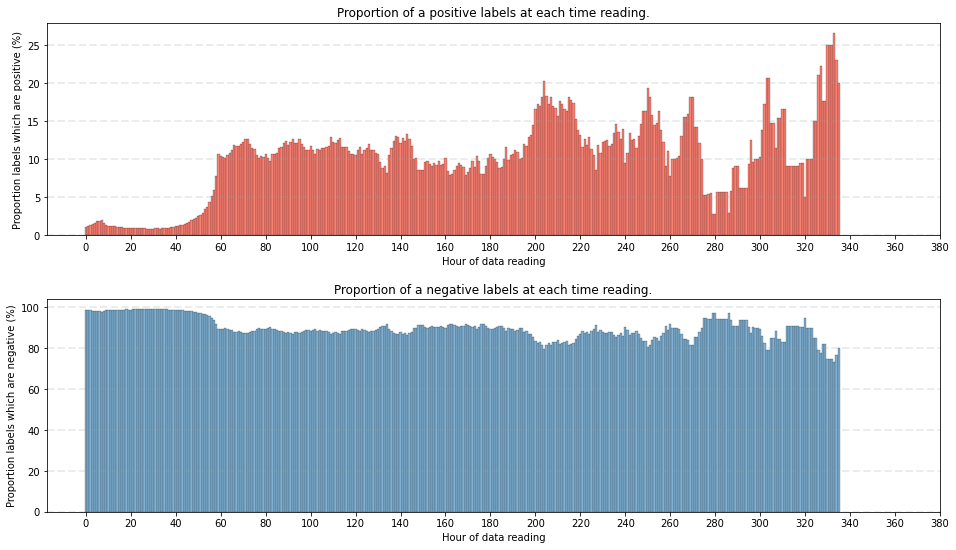

3:35: W291 trailing whitespace
4:80: E501 line too long (108 > 79 characters)
4:108: E225 missing whitespace around operator
6:80: E501 line too long (109 > 79 characters)
6:109: E225 missing whitespace around operator
11:26: E231 missing whitespace after ','
13:32: E261 at least two spaces before inline comment
13:77: W291 trailing whitespace
15:1: E265 block comment should start with '# '
15:80: E501 line too long (123 > 79 characters)
16:9: E201 whitespace after '('
16:17: E231 missing whitespace after ','
16:42: E251 unexpected spaces around keyword / parameter equals
16:44: E251 unexpected spaces around keyword / parameter equals
16:62: E251 unexpected spaces around keyword / parameter equals
16:64: E251 unexpected spaces around keyword / parameter equals
16:80: E501 line too long (100 > 79 characters)
25:9: E201 whitespace after '('
25:17: E231 missing whitespace after ','
25:42: E251 unexpected spaces around keyword / parameter equals
25:44: E251 unexpected spaces around keyword

In [ ]:
# Percentage rates of a sepsis labels across time

# Create the data for the y axises 
percent_pos = ((dataset_explore['time'].loc[dataset_explore['SepsisLabel'] > 0].value_counts().sort_index()/
                dataset_explore['time'].value_counts().sort_index())*100)
percent_neg = ((dataset_explore['time'].loc[dataset_explore['SepsisLabel'] == 0].value_counts().sort_index()/
                dataset_explore['time'].value_counts().sort_index())*100)

# We will use a subplot so we can plot two bar charts into one figure
# Define figure's size, place in subplot, type, grid overlay.
plt.figure(1, figsize=(16,9))
plt.subplot(211)
plt.subplots_adjust(hspace=0.3) # define better spacing between the subplots 

#dataset_explore['time'].loc[dataset_explore['SepsisLabel'] > 0].drop_duplicates()).count() # use to calculate x axis range
plt.bar( range(0,336), percent_pos, color = colours[1], width = 1, edgecolor='black', linewidth=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
plt.xticks(np.arange(0, 400, 20))
plt.title('Proportion of a positive labels at each time reading.')
plt.xlabel('Hour of data reading')
plt.ylabel('Proportion labels which are positive (%)')
# Define figure's size, place in subplot, type, grid overlay.
plt.subplot(212)
plt.bar( range(0,336), percent_neg, color = colours[0], width = 1, edgecolor='black', linewidth=0.2)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels, title and properties of legend.
plt.xticks(np.arange(0, 400, 20))
plt.title('Proportion of a negative labels at each time reading.')
plt.xlabel('Hour of data reading')
plt.ylabel('Proportion labels which are negative (%)')

# Save our figure and then show 
plt.savefig(figures_directory+'Sepsis_label_percent.jpg')
plt.show()

Lets look at rates of sepsis development

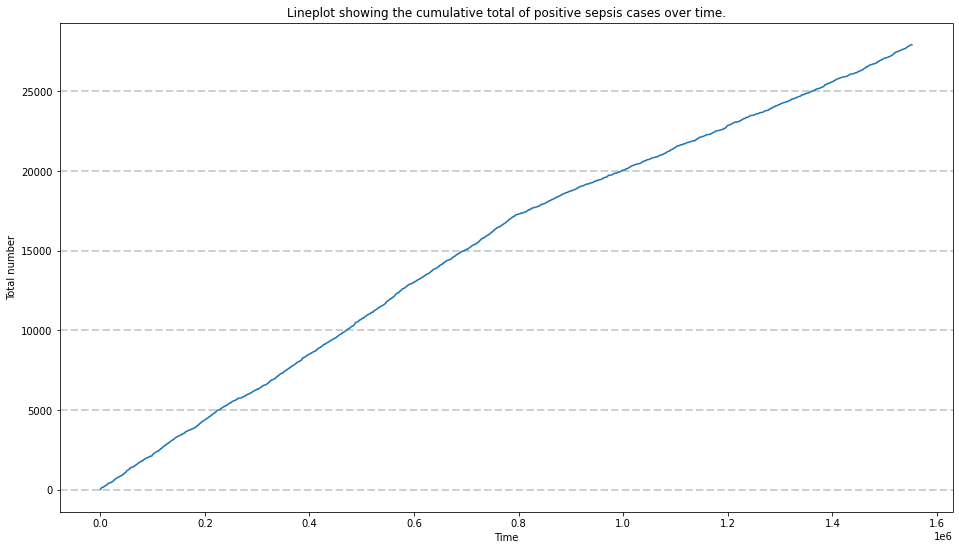

1:58: W291 trailing whitespace
3:19: E251 unexpected spaces around keyword / parameter equals
7:80: E501 line too long (86 > 79 characters)
10:32: W291 trailing whitespace


In [ ]:
# Lets look at the cumulative increase in cases over time 
# Define figure's size, type and grid overlay, with a subplot.
plt.figure(figsize =(16, 9))
plt.plot(dataset_explore_time['SepsisLabel'].cumsum())
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
# Define the axis labels and properties
plt.title('Lineplot showing the cumulative total of positive sepsis cases over time.')
plt.ylabel('Total number')
plt.xlabel('Time')
# Save our figure and then show 
fig.savefig(figures_directory+'cumulative_positive.jpg')

# Exploring the properties of the data


Lets look at the null content, since we know missing data is a common problem.

In [ ]:
print('Total number of null values present: ', dataset_explore.isnull().values.sum())

1:80: E501 line too long (85 > 79 characters)


Lets look at how many are null per feature

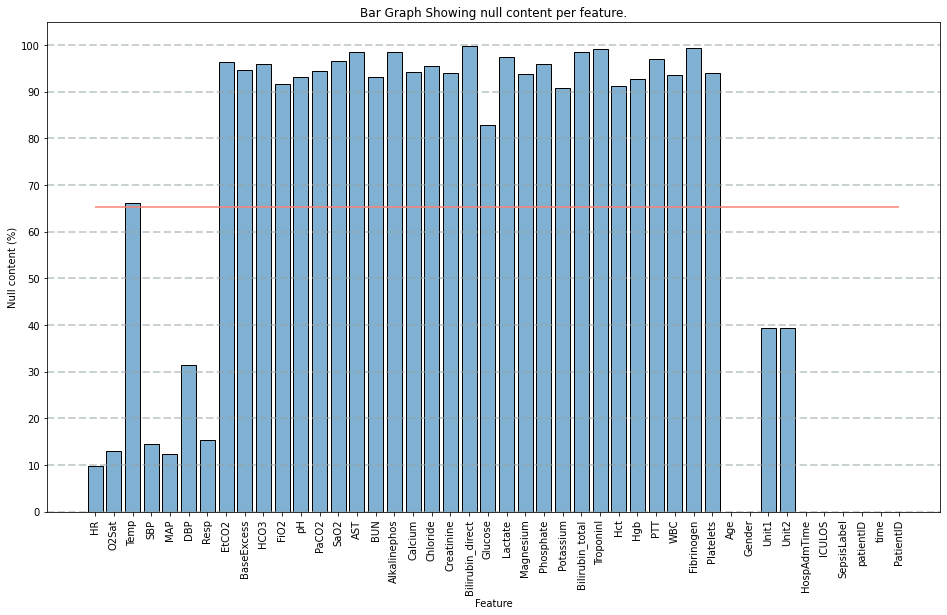

In [9]:
# Lets look the percent missing into a nice bar graph

# Define figure's size, type and grid overlay.
plt.figure(figsize=(16,9))
plt.bar(dataset_explore.columns, dataset_explore.isnull().mean() * 100, color=colours[0], edgecolor="black")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
# Define a mean line 
plt.hlines((dataset_explore.isnull().mean() * 100).mean(), 'HR', 'PatientID', color=colours[1])
# Define the axis labels and properties
plt.title('Bar Graph Showing null content per feature.')
plt.xlabel('Feature')
plt.xticks(rotation='vertical')
plt.locator_params(axis='y', nbins=10)
plt.ylabel('Null content (%)')
plt.yticks(np.arange(0, 110, 10))
# Save our figure and then show 
plt.savefig(figures_directory+'feature_nulls.jpg')
plt.show()

Lets look at how correlated each feature is to every other one

/tmp/ipykernel_328/826078889.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataset_explore.corr(), dtype=np.bool))


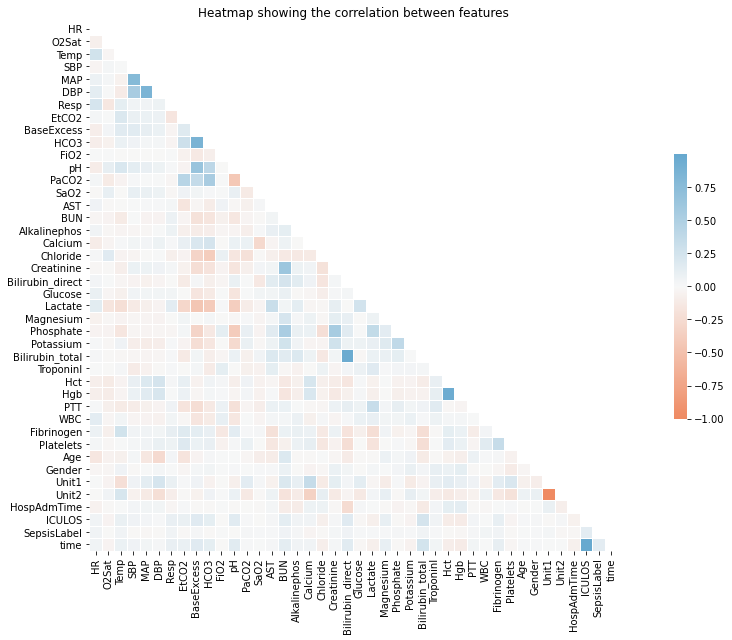

3:32: W291 trailing whitespace
7:80: E501 line too long (81 > 79 characters)
10:23: E231 missing whitespace after ','
11:80: E501 line too long (98 > 79 characters)
11:99: W291 trailing whitespace
12:13: E128 continuation line under-indented for visual indent
16:32: W291 trailing whitespace


In [ ]:
# Look at all feature correlations

# Use numpy to create data mask  
mask = np.triu(np.ones_like(dataset_explore.corr(), dtype=np.bool))
# Define colour map, using our predefined diverging pallette
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", diverging_colours)

# Define figure's size and type.
plt.figure(figsize=(16,9))
feature_heatmap = sns.heatmap(dataset_explore.corr(), mask=mask, cmap=cmap, center=0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})
# Define the title and layout
plt.title('Heatmap showing the correlation between features')
plt.tight_layout()
# Save our figure and then show 
fig = feature_heatmap.get_figure()
fig.savefig(figures_directory+'feature_correlation_heatmap.jpg')
plt.show()

Lets look at the class inbalance 

Number of positive labels:  27916
Number of negative labels:  1524294


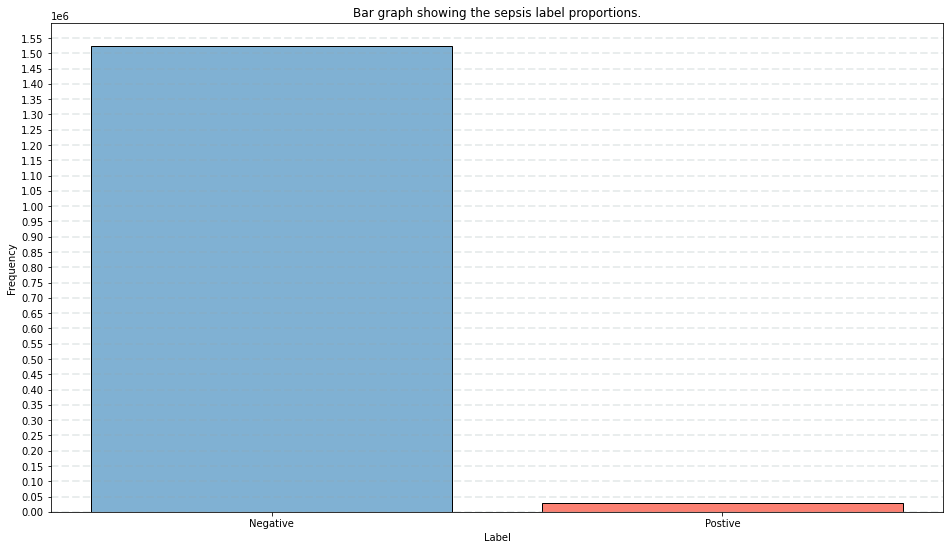

In [15]:
print('Number of positive labels: ', str(dataset_explore['SepsisLabel'].loc[dataset_explore['SepsisLabel'] == 1].count()))

print('Number of negative labels: ', str(dataset_explore['SepsisLabel'].loc[dataset_explore['SepsisLabel'] == 0].count()))


# Lets look at the class imbalance

# Define figure's size, type and grid overlay
plt.figure(figsize=(16, 9))
plt.bar(['Negative', 'Postive'], dataset_explore['SepsisLabel'].value_counts(), color=colours[0:2], edgecolor="black")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
# Define the axis labels and properties
plt.title('Bar graph showing the sepsis label proportions.')
plt.xlabel('Label')
plt.locator_params(axis='y', nbins=10)
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1600000, 50000))
# Save our figure and then show
plt.savefig(figures_directory+'sepsis_distribution.jpg')
plt.show()